<a href="https://colab.research.google.com/github/Engr-Usman-Ali/CodeAlpha_Task_Unemployment_Analysis/blob/main/CodeAlpha_Task_Unemployment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
!git clone https://github.com/Engr-Usman-Ali/CodeAlpha_Task_Unemployment_Analysis.git

fatal: destination path 'CodeAlpha_Task_Unemployment_Analysis' already exists and is not an empty directory.


In [45]:
# Load the dataset
file_path = "/content/CodeAlpha_Task_Unemployment_Analysis/Unemployment in India.csv"
df = pd.read_csv(file_path)

# Cleaning the dataset
df.columns = df.columns.str.strip() # Remove spaces in column names
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x) # Trim spaces in values
df.dropna(inplace=True) # Remove missing values

<ipython-input-45-0e77e6c79cb8>:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x) # Trim spaces in values


In [46]:

# Convert 'Date' column to datetime format
df["Date"] = pd.to_datetime(df["Date"], format="%d-%m-%Y")

# Display basic statistical summary
summary_stats = df.describe()
print("Summary Statistics:\n", summary_stats)

Summary Statistics:
                                 Date  Estimated Unemployment Rate (%)  \
count                            740                       740.000000   
mean   2019-12-12 18:36:58.378378496                        11.787946   
min              2019-05-31 00:00:00                         0.000000   
25%              2019-08-31 00:00:00                         4.657500   
50%              2019-11-30 00:00:00                         8.350000   
75%              2020-03-31 00:00:00                        15.887500   
max              2020-06-30 00:00:00                        76.740000   
std                              NaN                        10.721298   

       Estimated Employed  Estimated Labour Participation Rate (%)  
count        7.400000e+02                               740.000000  
mean         7.204460e+06                                42.630122  
min          4.942000e+04                                13.330000  
25%          1.190404e+06                    

In [47]:
# Unique regions and areas
unique_regions = df["Region"].nunique()
unique_areas = df["Area"].unique()
print(f"\nTotal Regions: {unique_regions}")
print(f"Areas: {unique_areas}")


Total Regions: 28
Areas: ['Rural' 'Urban']


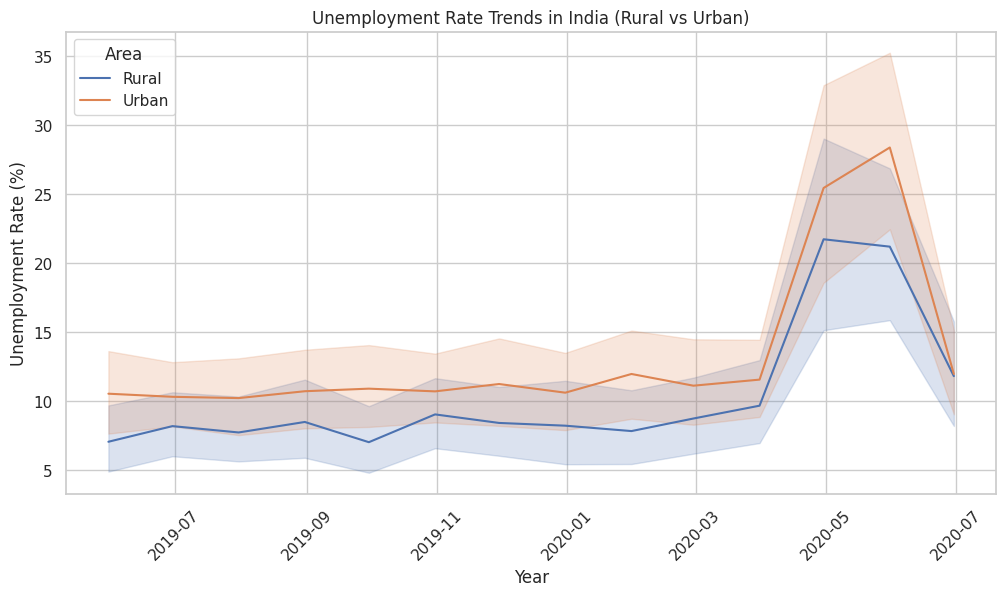

In [48]:
# Set plot style
sns.set(style="whitegrid")

# 1. **Unemployment Rate Trends Over Time**
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="Date", y="Estimated Unemployment Rate (%)", hue="Area")
plt.title("Unemployment Rate Trends in India (Rural vs Urban)")
plt.xlabel("Year")
plt.ylabel("Unemployment Rate (%)")
plt.legend(title="Area")
plt.xticks(rotation=45)
plt.show()

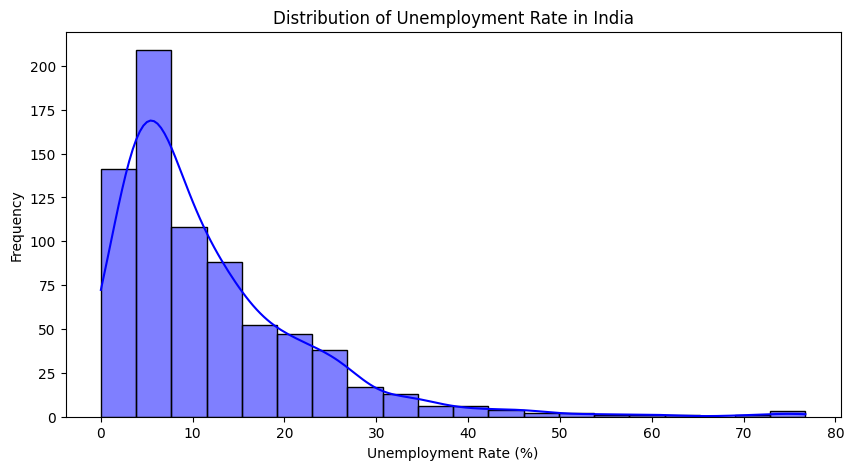

In [26]:
# 2. **Region-wise Unemployment Rate (Top 10)**
plt.figure(figsize=(14, 6))
top_regions = df.groupby("Region")["Estimated Unemployment Rate (%)"].mean().sort_values(ascending=False).head(10)
sns.barplot(x=top_regions.index, y=top_regions.values, palette="Reds_r")
plt.title("Top 10 Regions with Highest Unemployment Rate")
plt.xlabel("Region")
plt.ylabel("Average Unemployment Rate (%)")
plt.xticks(rotation=45)
plt.show()

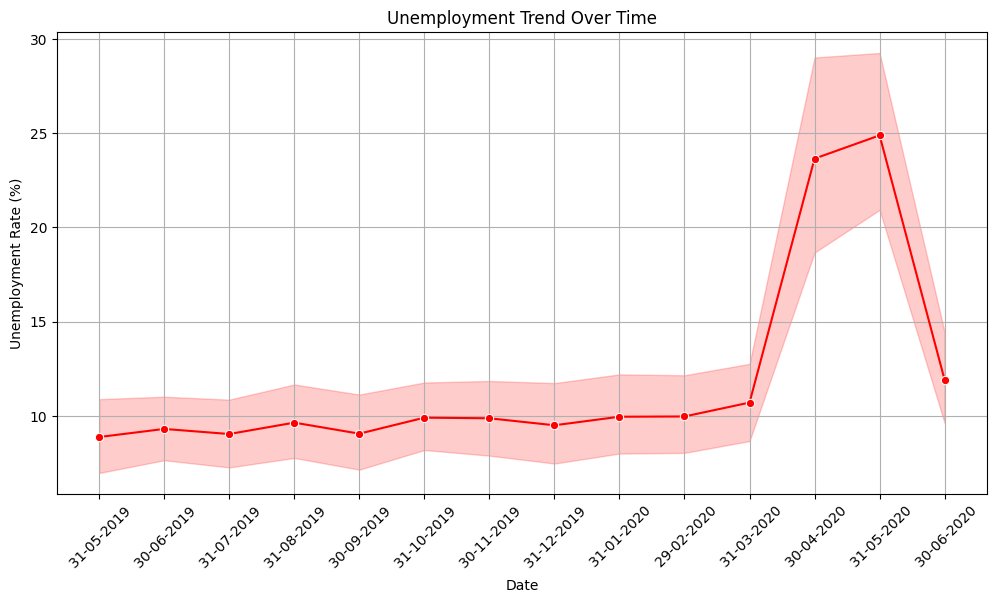

In [28]:
# 3. **Labour Participation Rate Distribution**
plt.figure(figsize=(10, 5))
sns.histplot(df["Estimated Labour Participation Rate (%)"], bins=20, kde=True, color="blue")
plt.title("Distribution of Labour Participation Rate in India")
plt.xlabel("Labour Participation Rate (%)")
plt.ylabel("Frequency")
plt.show()

<ipython-input-30-2a21fac4f156>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="region", y="estimated_unemployment_rate_(%)", data=df, palette="viridis")


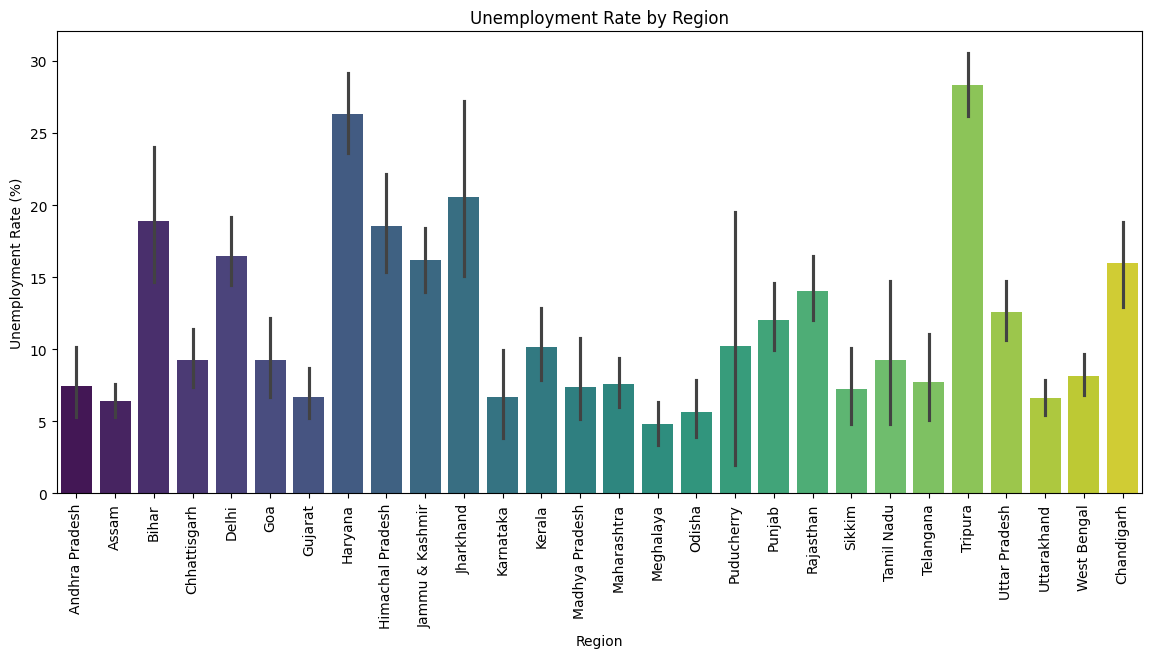

In [30]:
# 4. **Urban vs Rural Employment Comparison**
plt.figure(figsize=(12, 6))
sns.boxplot(x="Area", y="Estimated Employed", data=df, palette="coolwarm")
plt.title("Comparison of Estimated Employed Population (Rural vs Urban)")
plt.xlabel("Area")
plt.ylabel("Estimated Employed Population")
plt.show()